# Winino market analysis

Questions 

- We want to highlight 10 wines to increase our sales. Which ones should we choose and why?
- We have a limited marketing budget for this year. Which country should we prioritise and why?
- We would like to give awards to the best wineries. Come up with 3 relevant ones. Which wineries should we choose and  why?
- We detected that a big cluster of customers likes a specific combination of tastes. We identified a few keywords that match these tastes: coffee, toast, green apple, cream, and citrus (note that these keywords are case sensitive ⚠️). We - would like you to find all the wines that are related to these keywords. Check that at least 10 users confirm those keywords, to ensure the accuracy of the selection. Additionally, identify an appropriate group name for this cluster.
- We would like to select wines that are easy to find all over the world. Find the top 3 most common grapes all over the world and for each grape, give us the the 5 best rated wines.
- We would like to create a country leaderboard. Come up with a visual that shows the average wine rating for each country. Do the same for the vintages.
- One of our VIP clients likes Cabernet Sauvignon and would like our top 5 recommendations. Which wines would you recommend to him?

Other insights also welcomed

In [3]:
import sqlite3
import pandas as pd

connexion = sqlite3.connect("./db/vivino.db")
cursor = connexion.cursor()

In [4]:
query = f'''
SELECT DISTINCT wines.name AS wine_name, vintages.name AS vintage_name, wines.ratings_average AS wines_rating,
wines.ratings_count AS wines_ratings_count, vintages.ratings_average AS vintage_ratings, vintages.ratings_count AS vintage_ratings_count FROM wines
INNER JOIN vintages ON wines.id = vintages.wine_id
WHERE wines.ratings_count >= 100 OR vintages.ratings_count >= 100
ORDER BY wines.ratings_average DESC, vintages.ratings_average DESC


'''


df = pd.read_sql_query (query, connexion)
df.head(n=10)


,wine_name,vintage_name,wines_rating,wines_ratings_count,vintage_ratings,vintage_ratings_count
0,Cabernet Sauvignon,Scarecrow Cabernet Sauvignon 2015,4.8,2941,4.8,243
1,Amarone della Valpolicella Classico Riserva,Quintarelli Giuseppe Amarone della Valpolicell...,4.8,587,0.0,15
2,Fratini Bolgheri Superiore,Tenuta Hortense Fratini Bolgheri Superiore 2018,4.8,153,0.0,6
3,Mágico,Sierra Cantabria Mágico 2019,4.8,146,0.0,8
4,Clos du Mesnil,Krug Clos du Mesnil 1998,4.7,2471,4.8,235
5,Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,4.7,9564,4.8,1004
6,Amarone della Valpolicella Monte Lodoletta,Dal Forno Romano Amarone della Valpolicella Mo...,4.7,7947,4.8,88
7,Harlan Estate Red,Harlan Estate Harlan Estate Red 1998,4.7,7231,4.8,104
8,Clos du Mesnil,Krug Clos du Mesnil 2000,4.7,2471,4.8,333
9,Pomerol,Pétrus Pomerol 1990,4.7,32157,4.8,1190


The wines above are the highest rated wines with a minimum of 100 ratings. These can be considered quiet popular wines. Paired with high user ratings will make a good top 10

What about countries?

/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'États-Unis'),
  Text(1, 0, 'Suisse'),
  Text(2, 0, 'Roumanie'),
  Text(3, 0, 'Portugal'),
  Text(4, 0, 'Israël'),
  Text(5, 0, 'Espagne'),
  Text(6, 0, 'Argentine'),
  Text(7, 0, 'Italie'),
  Text(8, 0, 'Allemagne'),
  Text(9, 0, 'France')])

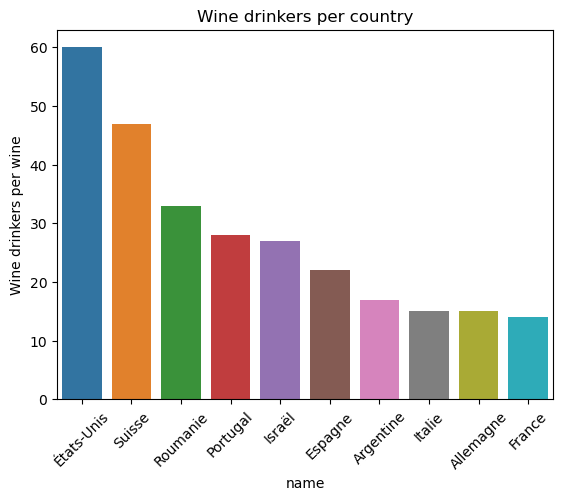

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# rename axes labels

query_countries = f'''
SELECT name, users_count, wines_count, (users_count / wines_count) AS difference_user_wine 
FROM countries
ORDER BY difference_user_wine DESC
LIMIT 10
'''


df_countries = pd.read_sql_query (query_countries, connexion)
sns.barplot(data=df_countries, x="name",y="difference_user_wine")

# Adjust layout to make room for the table:
plt.ylabel("Wine drinkers per wine")
plt.title('Wine drinkers per country')
plt.xticks(rotation=45)


/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'France'),
  Text(1, 0, 'Italie'),
  Text(2, 0, 'États-Unis'),
  Text(3, 0, 'Allemagne'),
  Text(4, 0, 'Espagne'),
  Text(5, 0, 'Australie'),
  Text(6, 0, 'Chili'),
  Text(7, 0, 'Portugal'),
  Text(8, 0, 'Argentine'),
  Text(9, 0, 'Suisse')])

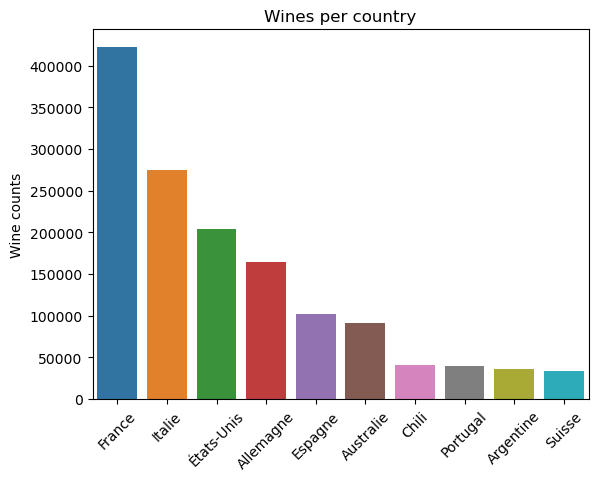

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# rename axes labels

query_countries = f'''
SELECT name, users_count, wines_count, (users_count / wines_count) AS difference_user_wine 
FROM countries
ORDER BY wines_count DESC
LIMIT 10
'''


df_countries = pd.read_sql_query (query_countries, connexion)
sns.barplot(data=df_countries, x="name",y="wines_count")

# Adjust layout to make room for the table:
plt.xlabel("")
plt.ylabel("Wine counts")
plt.title('Wines per country')
plt.xticks(rotation=45)


## Which country to prioritize?

USA and Swistzerland seem to have the highest ratio of wine drinkers to wines produced. These would be potential countries to target with a broader selection of wines.

--------

## Flavour profiles 
Let's now focus on something more interesting: flavour profiles. How do flavour profiles differ between countries? And do we know what kind of flavour profile a country/region prefers and does that match to what they produce??


For the must-haves, let's look at wines with a specific flavour profile: coffee, toast, green apple, cream, and citrus. With at least 10 users confirming these flavours

In [7]:
query_taste = f'''
SELECT DISTINCT * FROM wines
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
INNER JOIN keywords ON keywords_wine.keyword_id = keywords.id
WHERE keywords.name = "coffee" AND keywords_wine.count >= 10
OR keywords.name = "toast" AND keywords_wine.count >= 10
OR keywords.name = "green apple" AND keywords_wine.count >= 10
OR keywords.name = "cream" AND keywords_wine.count >= 10
OR keywords.name = "citrus" AND keywords_wine.count >= 10
GROUP BY wines.name

'''

df_taste = pd.read_sql_query (query_taste, connexion)
df_taste.head(n=10)



,id,name,is_natural,region_id,winery_id,ratings_average,ratings_count,url,acidity,fizziness,...,sweetness,tannin,user_structure_count,keyword_id,wine_id,group_name,keyword_type,count,id,name
0,1256452,'Giulio Ferrari' Riserva del Fondatore,0,2471,5434,4.6,12592,https://www.seulementproduitsitaliens.be/spec_...,3.328579,3.330387,...,NaN,NaN,21.0,123,1256452,microbio,primary,72,123,cream
1,23094,25 anni Montefalco Sagrantino,0,1802,1676,4.3,5419,https://www.seulementproduitsitaliens.be/spec_...,3.115863,NaN,...,1.539812,3.512506,258.0,117,23094,oak,primary,23,117,coffee
2,1789271,5 Puttonyos Aszú (Blue Label),0,541,2025,4.4,11106,https://www.seulementproduitsitaliens.be/eccel...,4.947574,NaN,...,4.955007,NaN,10.0,195,1789271,tree_fruit,primary,12,195,green apple
3,28214,5 Stelle Sfursat,0,746,2995,4.5,10740,https://www.seulementproduitsitaliens.be/spec_...,4.598433,NaN,...,1.927198,4.336158,313.0,117,28214,oak,primary,35,117,coffee
4,1958459,50 & 50,0,394,4772,4.4,9157,https://www.seulementproduitsitaliens.be/spec_...,3.201763,NaN,...,1.785820,3.122624,741.0,117,1958459,oak,primary,13,117,coffee
5,3667877,6 Anime Puglia Rosso,0,548,19992,4.3,2476,https://www.wijnig.nl/cignomoro-6-anime-puglia...,2.135559,NaN,...,2.893095,2.674498,166.0,117,3667877,oak,primary,10,117,coffee
6,11890,60 Sessantanni Old Vines Primitivo di Manduria,0,2753,55648,4.5,94289,https://www.wijnig.nl/san-marzano-60-sessantan...,1.789258,NaN,...,3.170110,2.212944,2765.0,117,11890,oak,primary,136,117,coffee
7,6343385,80 Vecchie Vigne Primitivo di Manduria Old Vines,0,2753,19992,4.4,2476,https://www.vanoudsdezwaan.nl/cignomoro-80-vec...,1.819996,NaN,...,3.126702,2.236752,116.0,117,6343385,oak,primary,12,117,coffee
8,1107336,ARTEMIS Cabernet Sauvignon,0,25,3310,4.4,81351,https://www.wereldwijnonline.be/stags-leap-art...,3.383825,NaN,...,1.603856,3.286232,3174.0,117,1107336,oak,primary,116,117,coffee
9,25474,Aconcagua Valley,0,1573,104127,4.5,18482,https://www.topwijnen.be/nl/product/wijnen/chi...,3.123490,NaN,...,1.909263,3.551229,652.0,117,25474,oak,primary,68,117,coffee


In [60]:
query_taste = f'''
SELECT wines.name AS wine_name, vintages.name AS vintage_name, keywords_wine.count AS user_count, url 
FROM wines
INNER JOIN vintages ON wines.id = vintages.wine_id
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
INNER JOIN keywords ON keywords_wine.keyword_id = keywords.id
WHERE keywords.name IN ("coffee", "toast", "green apple", "cream", "citrus")
AND keywords_wine.count >= 10
GROUP BY wines.name
HAVING COUNT(DISTINCT keywords.name) = 5

'''

df_taste = pd.read_sql_query (query_taste, connexion)
df_taste.head(n=10)




,wine_name,vintage_name,user_count,url
0,Belle Epoque Brut Champagne,Perrier-Jouët Belle Epoque Brut Champagne 2013,224,https://www.seulementproduitsitaliens.be/eccel...
1,Blanc des Millénaires,Charles Heidsieck Blanc des Millénaires 2007,160,https://www.seulementproduitsitaliens.be/eccel...
2,Brut Champagne,Dom Pérignon Brut Champagne 2000,2165,http://www.vivino.com/wines/3443678
3,Comtes de Champagne Blanc de Blancs,Taittinger Comtes de Champagne Blanc de Blancs...,587,http://www.vivino.com/wines/2214882
4,Cristal Brut Champagne (Millésimé),Louis Roederer Cristal Brut Champagne (Millési...,464,https://www.seulementproduitsitaliens.be/spec_...
5,Cuvée des Enchanteleurs Brut Champagne,Henriot Cuvée des Enchanteleurs Brut Champagne...,31,https://www.seulementproduitsitaliens.be/spec_...
6,Dom Ruinart Blanc de Blancs Brut Champagne,Ruinart Dom Ruinart Blanc de Blancs Brut Champ...,226,https://www.vino.com/fr/dettaglio/champagne-bl...
7,Grande Cuvée,Krug Grande Cuvée,713,http://www.vivino.com/wines/164942599
8,La Grande Année Brut Champagne,Bollinger La Grande Année Brut Champagne 2012,525,https://www.seulementproduitsitaliens.be/eccel...
9,La Grande Dame Brut Champagne,Veuve Clicquot La Grande Dame Brut Champagne 2008,244,https://www.seulementproduitsitaliens.be/spec_...


In [44]:
# group names associated with the selected flavours
query_taste = f'''
SELECT DISTINCT group_name, SUM(keywords_wine.count), keywords.name FROM wines
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
INNER JOIN keywords ON keywords_wine.keyword_id = keywords.id
WHERE keywords.name = "coffee" AND keywords_wine.count >= 10
OR keywords.name = "toast" AND keywords_wine.count >= 10
OR keywords.name = "green apple" AND keywords_wine.count >= 10
OR keywords.name = "cream" AND keywords_wine.count >= 10
OR keywords.name = "citrus" AND keywords_wine.count >= 10
GROUP BY group_name

'''

df_taste = pd.read_sql_query (query_taste, connexion)
df_taste.head(n=10)



,group_name,SUM(keywords_wine.count),name
0,citrus_fruit,17008,citrus
1,microbio,27870,cream
2,non_oak,26343,coffee
3,oak,14081,coffee
4,tree_fruit,4727,green apple


For group names on the selected flavour profile of any: coffee, toast, green apple, cream, and citrus the group names are shown above. The mayority of flavour profiles fall under oak/non-oak and microbial group. The top 10 wines that match this are some kind of **champagne**.

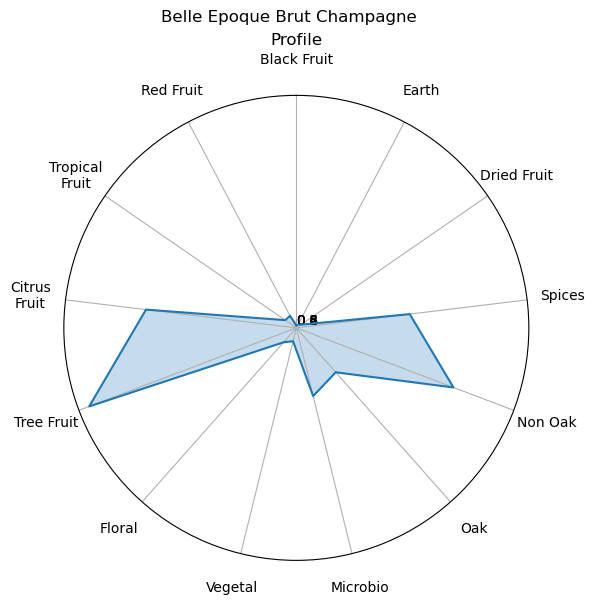

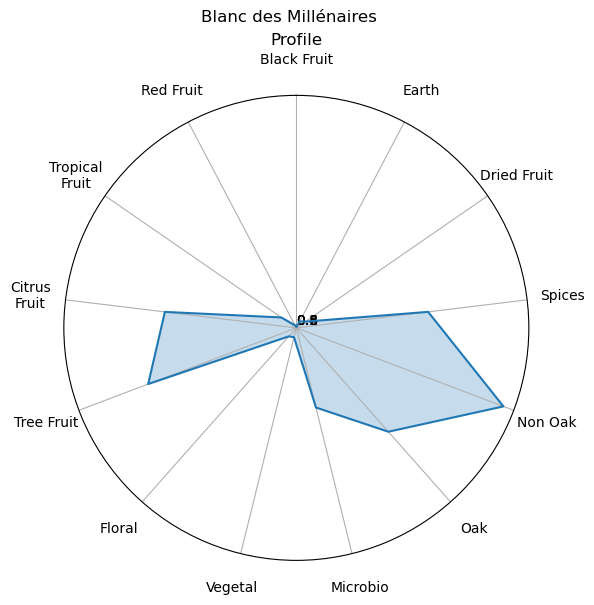

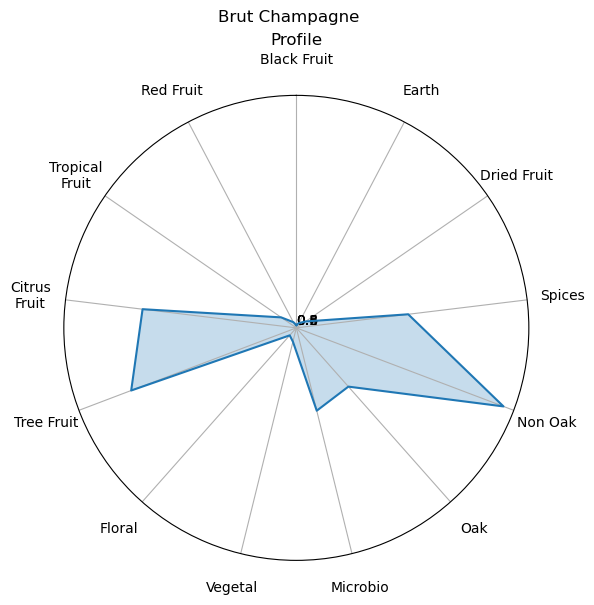

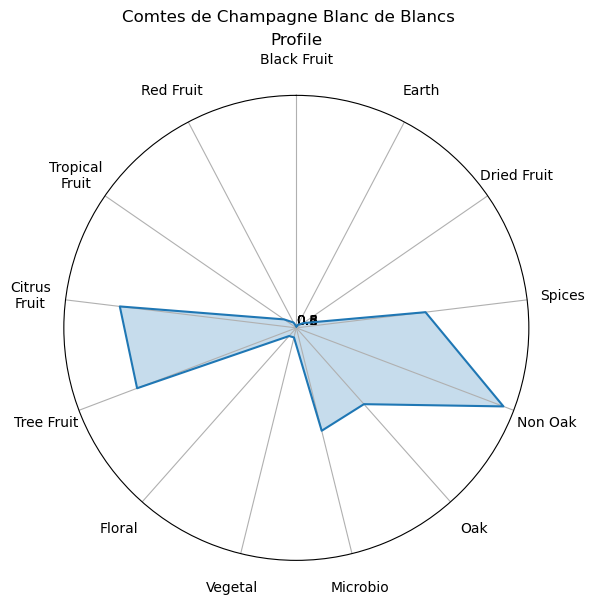

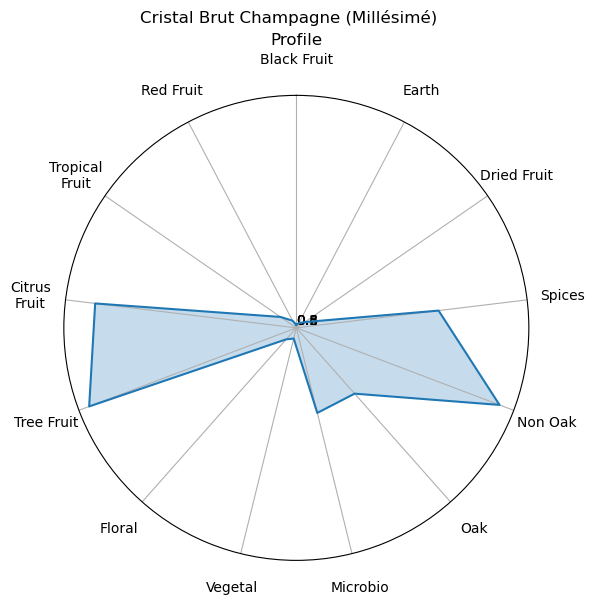

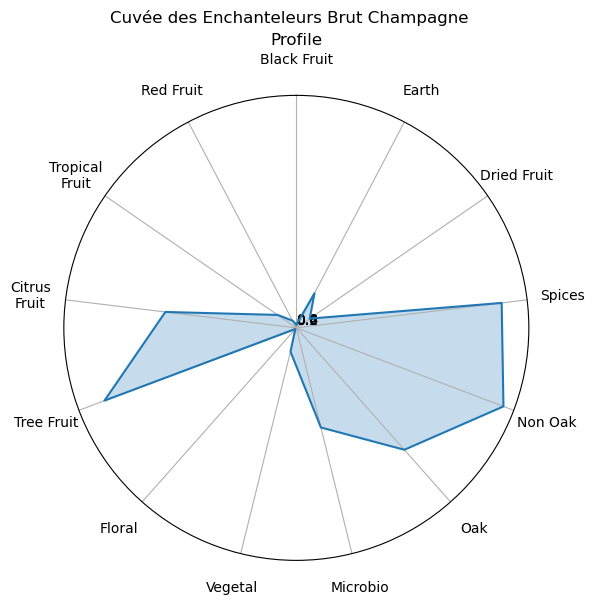

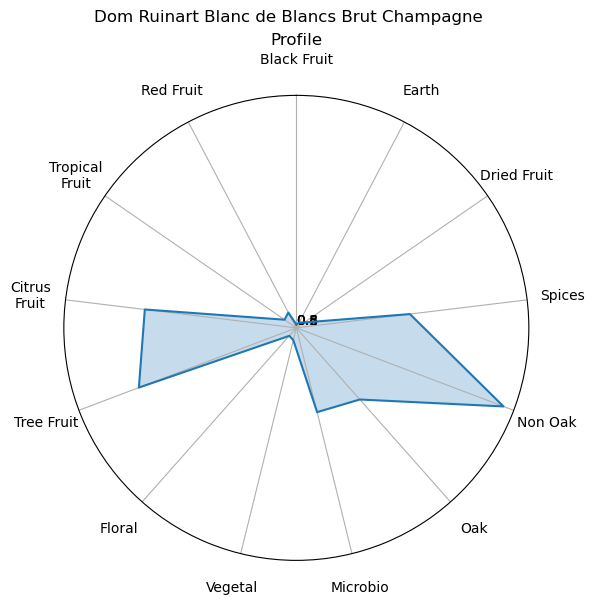

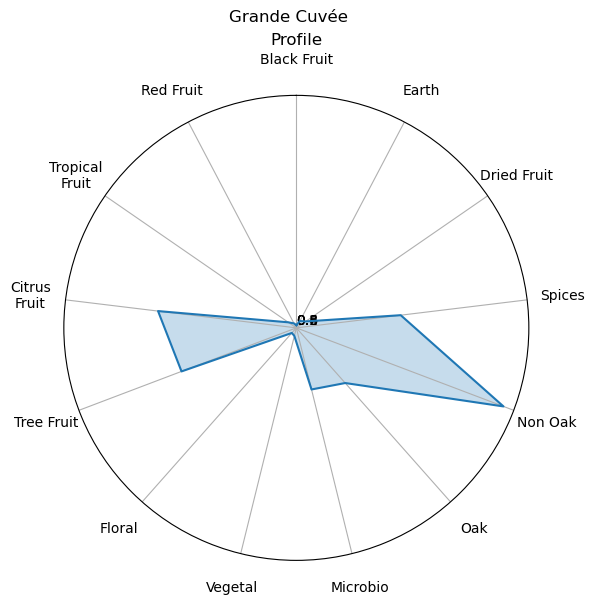

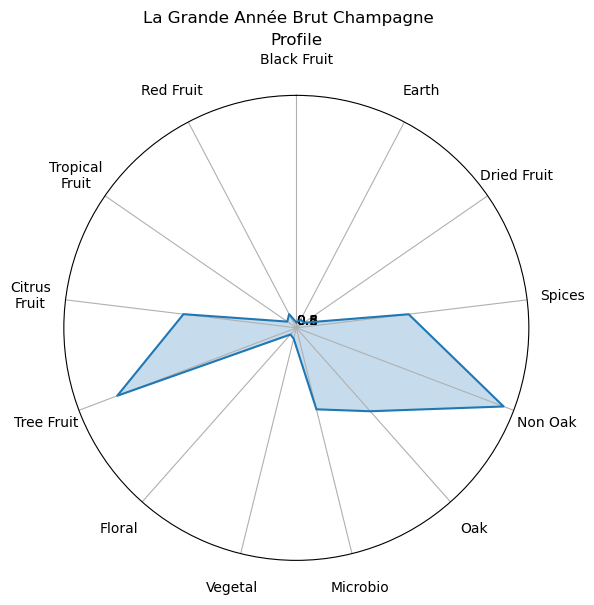

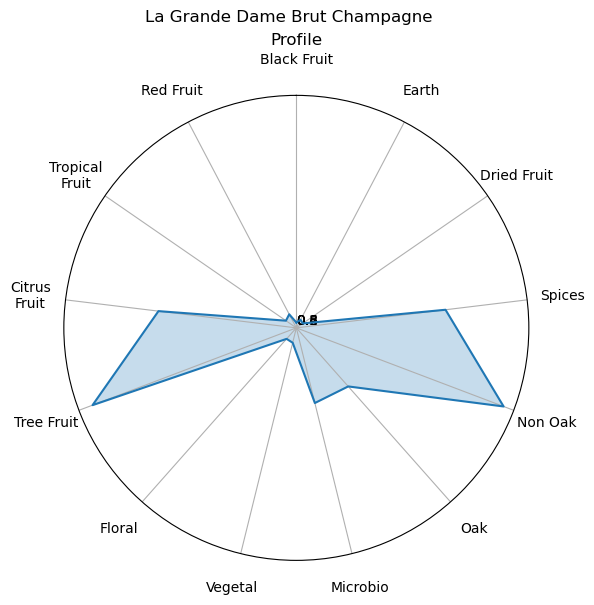

In [59]:
# Get the top 10 champagne flavor profiles 

champagne = tuple(df_taste.wine_name)
champagnetop10 = champagne[0:10]

query_champagne = f'''
SELECT wines.name AS wine_name,
vintages.name AS vintage_name,
group_name AS flavor, 
SUM(keywords_wine.count) AS flavor_count, 
acidity, intensity, sweetness, tannin, fizziness
FROM wines
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
INNER JOIN vintages ON wines.id = vintages.wine_id
WHERE keyword_type = "primary" AND wine_name IN {champagnetop10}
GROUP BY wines.name, group_name

'''

df_champagne = pd.read_sql_query (query_champagne, connexion)
df_champagne

for i in range(10):
    df_to_plot = df_champagne[df_champagne.wine_name == champagnetop10[i]]
    name = champagnetop10[i]
    spider_plot(df_to_plot, name, save_path=f"output/spider_plot_champ_{name}.png")

## Plotting flavour

The following query looks for wines and the corresponding group_name. The group name can be one of 13 main categories for the flavour profile. First I will look at primary flavour profiles based on group_name (flav_cat) and count of the group_name. 

In [61]:
# Unique group_names. These are considered as flavour groups for the flavour profiling

query_unique = f'''
SELECT DISTINCT group_name, keyword_type FROM keywords_wine
WHERE keyword_type = "primary"
'''

df_query_unique = pd.read_sql_query (query_unique, connexion)
df_query_unique.head(n=20)

,group_name,keyword_type
0,earth,primary
1,oak,primary
2,red_fruit,primary
3,non_oak,primary
4,spices,primary
5,black_fruit,primary
6,microbio,primary
7,citrus_fruit,primary
8,floral,primary
9,dried_fruit,primary


In [62]:
# query to get the flavour groups and counts per wine

query_taste = f'''
SELECT wines.name AS wine_name,
vintages.name AS vintage_name,
group_name AS flavor, 
SUM(keywords_wine.count) AS flavor_count, 
acidity, intensity, sweetness, tannin, fizziness
FROM wines
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
INNER JOIN vintages ON wines.id = vintages.wine_id
WHERE keyword_type = "primary"
GROUP BY wines.name, group_name

'''

query_taste_df = pd.read_sql_query (query_taste, connexion)

# example wine
data = query_taste_df[query_taste_df.wine_name == "'Giulio Ferrari' Riserva del Fondatore"]
data.head()
# char = ["acidity", "intensity", "sweetness", "tannin", "fizziness"]
# data = data[char]
# data_t = data.transpose()
# data_t


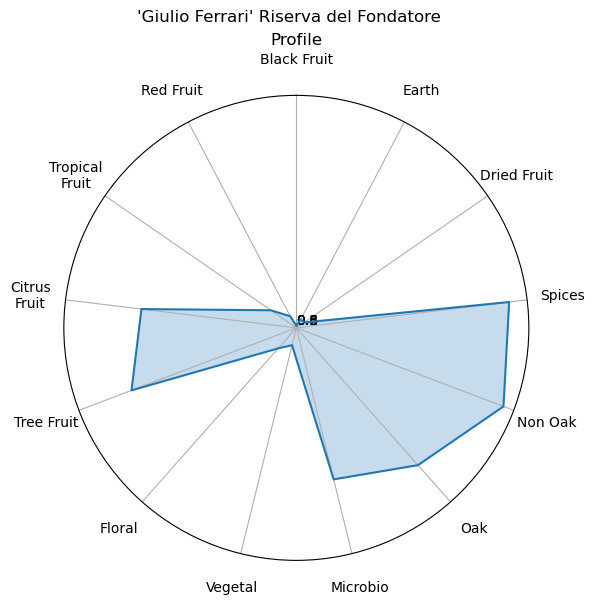

In [57]:
# plotting flavour profiles using a spider plot

from src.spider_chart import radar_factory
import matplotlib.pyplot as plt

data = query_taste_df[query_taste_df.wine_name == "'Giulio Ferrari' Riserva del Fondatore"]

def spider_plot(df: pd.DataFrame, name: str = 'unknown',  save_path: str = None):
    '''input a dataframe with at least two columns: one for the flavours name and one with the counts/score '''

    spoke_labels = ["Black Fruit", "Red Fruit", "Tropical\nFruit", "Citrus\nFruit",
    "Tree Fruit","Floral", "Vegetal", "Microbio", "Oak", "Non Oak", "Spices",  "Dried Fruit", "Earth"
    ]

    order = ["black_fruit", "red_fruit", "tropical_fruit", "citrus_fruit", 
        "tree_fruit", "floral", "vegetal", "microbio", 
        "oak", "non_oak", "earth", "spices", "dried_fruit"]

    # char = ["acidity", "intensity", "sweetness", "tannin", "fizziness"]

    df = df.set_index('flavor').reindex(order).reset_index()
    N = len(df.flavor)
    theta = radar_factory(N, frame='circle')

    # Initialize figure
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    # Figure name
    fig.suptitle(name)
    
    # Plot the flavor profile
    # fig.canvas.draw()
    ax1.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax1.set_title("Profile")

    # Insert flavor data
    ax1.plot(theta, df.flavor_count)
    ax1.fill(theta, df.flavor_count,  alpha=0.25)
    ax1.set_varlabels(spoke_labels)
    ax1.tick_params(pad=15)
    
    # # char plots
    # theta2 = radar_factory(5,frame='circle')
    # char = ["acidity", "intensity", "sweetness", "tannin", "fizziness"]
    # df = df[char]
    # df_t = df.transpose()
    
    # #---- Plot the chararcteristics
    # ax2.set_rgrids([0.2, 0.4, 0.6, 0.8])
    # ax2.set_title("Characteristics")

    # # Insert characteristics data
    # ax2.plot(theta2, df_t.iloc[:,0])
    # ax2.fill(theta2, df_t.iloc[:,0],  alpha=0.25)
    # ax2.set_varlabels(char)
    # # ax2.tick_params(pad=15)
    

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show() 


spider_plot(data, "'Giulio Ferrari' Riserva del Fondatore")#, save_path= "output/radar_plot_Ferrari.png")
# fig.savefig(f"output/radar_plot_Ferrari.png", bbox_inches = 'tight')


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (5).

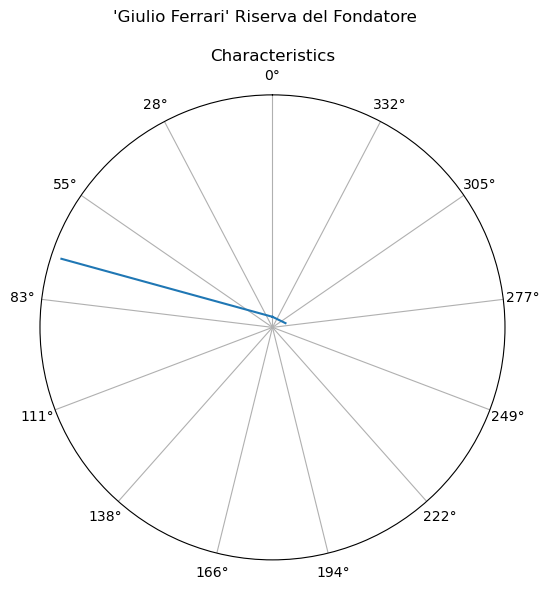

In [35]:
# code to run spider plot on the characteristics - but not working fully yet

import pandas as pd
from src.spider_chart import radar_factory
import matplotlib.pyplot as plt

def spider_plot(df: pd.DataFrame, name: str = 'unknown',  save_path: str = None):
    '''input a dataframe with at least two columns: one for the flavours name and one with the counts/score '''
    
    char = ["acidity", "intensity", "sweetness", "tannin", "fizziness"]

    # Initialize figure
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    # Figure name
    fig.suptitle(name)
    
    # char plots
    theta = radar_factory(5, frame='circle')
    df = df[char]
    df_t = df.transpose()
    
    # Plot the characteristics
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0])  # Set radial ticks for characteristics
    ax.set_title("Characteristics")

    # Insert characteristics data
    ax.plot(theta, df_t.iloc[:, 0])
    ax.fill(theta, df_t.iloc[:, 0], alpha=0.25)
    ax.set_varlabels(char)
    # ax2.tick_params(pad=15)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Replace 'data' with your actual data
spider_plot(data, "'Giulio Ferrari' Riserva del Fondatore")#, save_path="output/radar_plot_Ferrari_char.png")


Lets plot the flavor profile of the TOP 10 wines from part 1. These are wines with highest user ratings and counts.

In [85]:
top_wines = f'''
SELECT DISTINCT wines.name AS wine_name, vintages.name AS vintage_name, wines.ratings_average AS wines_rating,
wines.ratings_count AS wines_ratings_count, vintages.ratings_average AS vintage_ratings, vintages.ratings_count AS vintage_ratings_count, group_name AS flavor,
SUM(keywords_wine.count)AS flavor_count
FROM wines
INNER JOIN vintages ON wines.id = vintages.wine_id
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
WHERE wines.ratings_count >= 1000 OR vintages.ratings_count >= 1000 AND keyword_type = "primary"
GROUP BY wines.name, group_name
ORDER BY wines.ratings_average DESC, vintages.ratings_average DESC


'''

top_wines_df = pd.read_sql_query (top_wines, connexion)
top_wines_df

,wine_name,vintage_name,wines_rating,wines_ratings_count,vintage_ratings,vintage_ratings_count,flavor,flavor_count
0,Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,4.7,9564,4.8,1004,vegetal,339
1,Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,4.7,9564,4.8,1004,tropical_fruit,123
2,Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,4.7,9564,4.8,1004,tree_fruit,1344
3,Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,4.7,9564,4.8,1004,spices,315
4,Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,4.7,9564,4.8,1004,red_fruit,33
...,...,...,...,...,...,...,...,...
6398,Capellanía Reserva,Marqués de Murrieta Capellanía Reserva 2017,4.1,7314,4.4,324,floral,43
6399,Capellanía Reserva,Marqués de Murrieta Capellanía Reserva 2017,4.1,7314,4.4,324,earth,400
6400,Capellanía Reserva,Marqués de Murrieta Capellanía Reserva 2017,4.1,7314,4.4,324,dried_fruit,26
6401,Capellanía Reserva,Marqués de Murrieta Capellanía Reserva 2017,4.1,7314,4.4,324,citrus_fruit,374


In [86]:
top_wines_names = f'''
SELECT DISTINCT wines.name AS wine_name, vintages.name AS vintage_name, 
wines.ratings_average AS wines_rating,
wines.ratings_count AS wines_ratings_count, 
vintages.ratings_average AS vintage_ratings, 
vintages.ratings_count AS vintage_ratings_count
FROM wines
INNER JOIN vintages ON wines.id = vintages.wine_id
INNER JOIN keywords_wine ON wines.id = keywords_wine.wine_id
WHERE wines.ratings_count >= 1000 OR vintages.ratings_count >= 1000
GROUP BY wines.name
ORDER BY wines.ratings_average DESC, wines.ratings_count DESC, 
vintages.ratings_average DESC,
vintages.ratings_count DESC
'''

top_wines_names_df = pd.read_sql_query (top_wines_names, connexion)
top_wines_names_df
top_list = top_wines_names_df.wine_name.to_list()


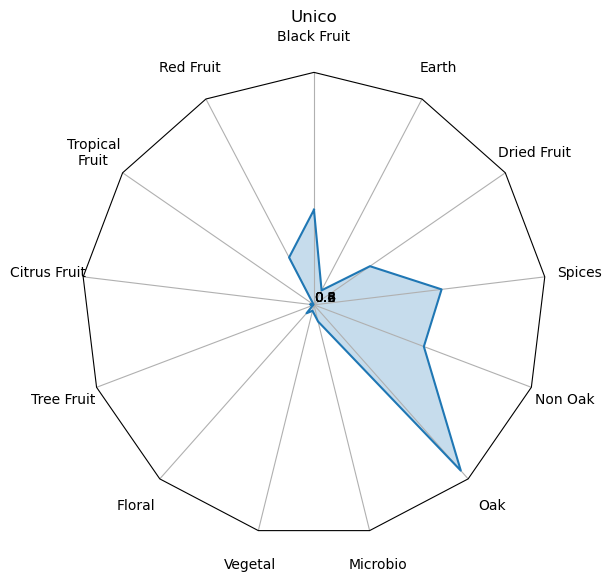

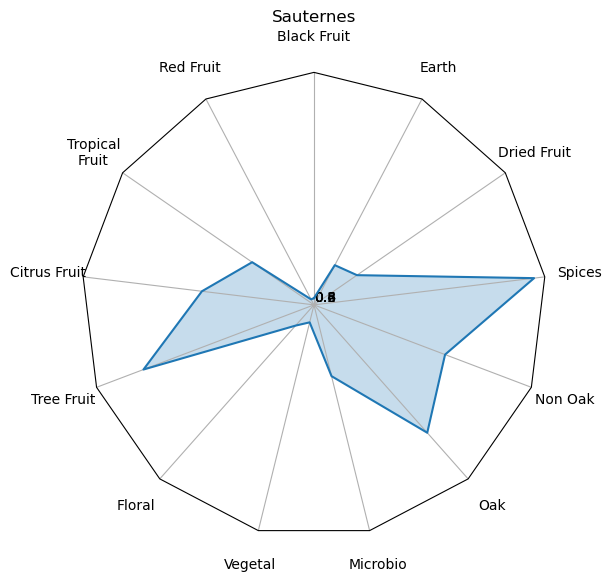

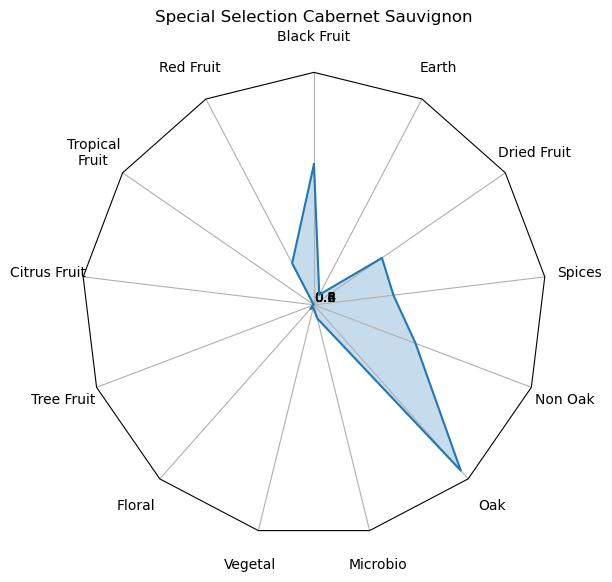

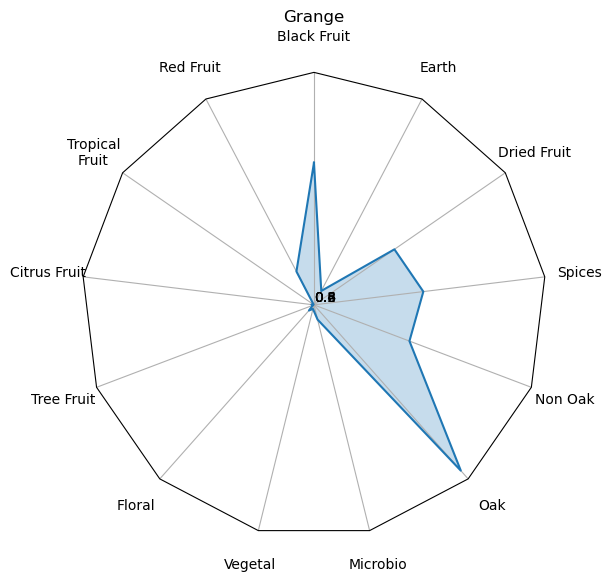

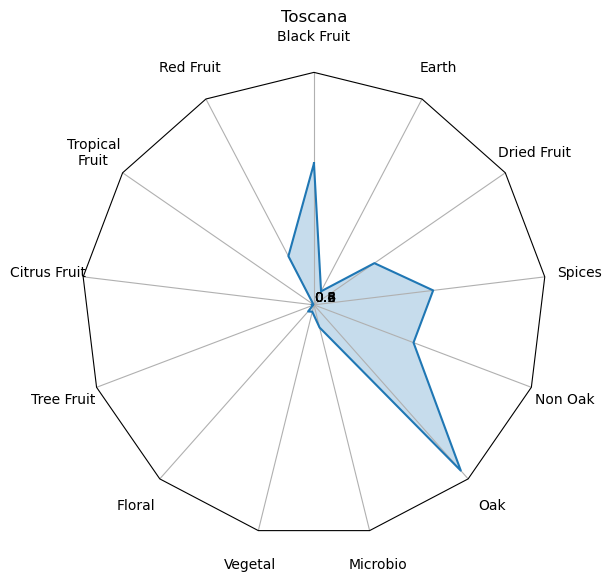

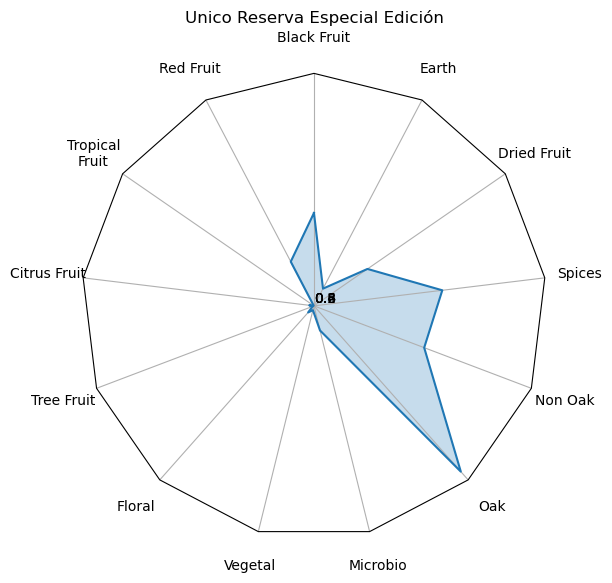

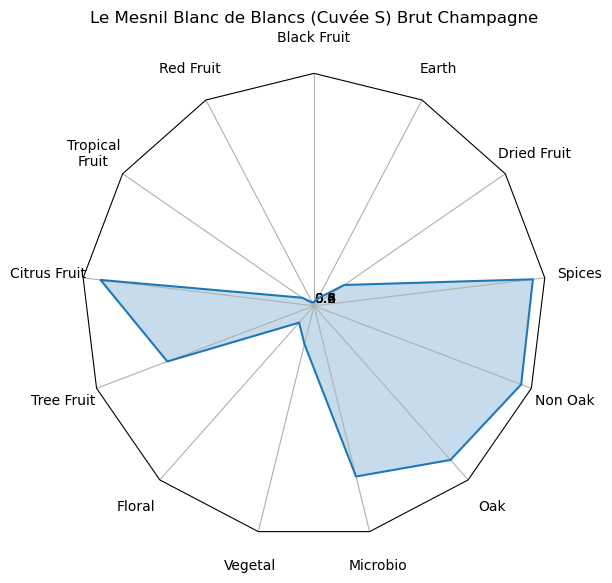

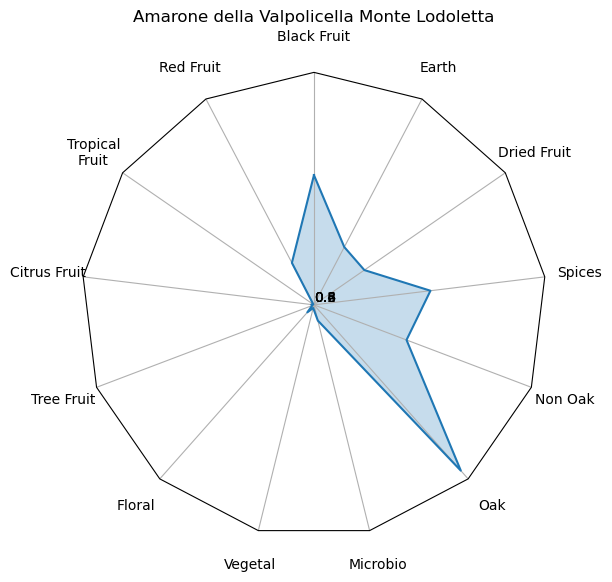

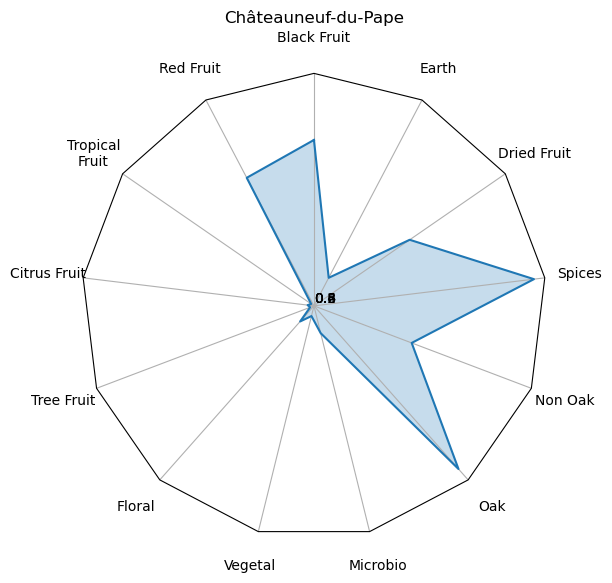

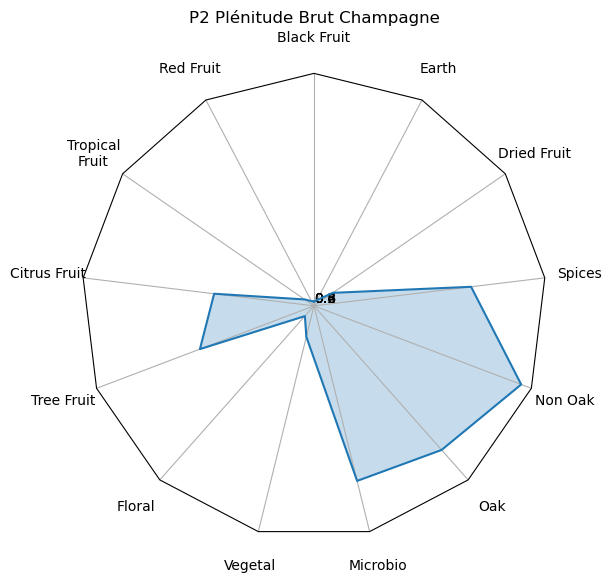

In [90]:
for i in range(10):
    df_to_plot = top_wines_df[top_wines_df.wine_name == top_list[i]]
    name = top_list[i]
    spider_plot(df_to_plot, name, save_path=f"output/spider_plot_{name}.png")


It looks like most of these wines are either champagne of red wines based on the flavour profile and/or name.

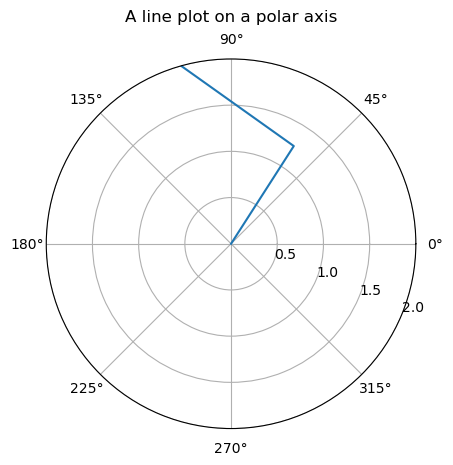

In [25]:
# simplified polar/radar plot WIP
import matplotlib.pyplot as plt
import numpy as np

num_vars = 5
theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
# theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## Average wine rating per country


In [82]:
query_top_countries = f'''
SELECT countries.name AS country, 
countries.users_count AS users_country, 
countries.wines_count AS wines_count_country,
AVG(wines.ratings_average) AS wines_rating_average, 
AVG(vintages.ratings_average) AS vintage_ratings_average
FROM countries
INNER JOIN regions ON countries.code = regions.country_code
INNER JOIN wines ON regions.id = wines.region_id
INNER JOIN vintages ON wines.id = vintages.wine_id
GROUP BY countries.name
ORDER BY wines.ratings_average DESC, vintages.ratings_average DESC
'''


query_top_countries_df = pd.read_sql_query (query_top_countries, connexion)
query_top_countries_df.head()


,country,users_country,wines_count_country,wines_rating_average,vintage_ratings_average
0,Australie,1022965,90954,4.500000,2.831250
1,États-Unis,12273684,204060,4.506250,3.698214
2,Allemagne,2549989,164533,4.475000,1.695833
3,Hongrie,102235,16605,4.464286,3.171429
4,France,5973301,422503,4.484050,3.065049


/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ibex/miniconda3/envs/python_env_1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(4.2, 4.6)

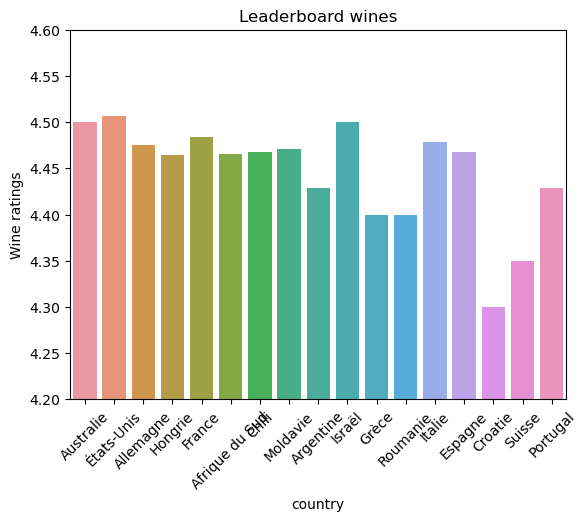

In [91]:
sns.barplot(data=query_top_countries_df, x="country",y="wines_rating_average")

# Adjust layout to make room for the table:
plt.ylabel("Wine ratings")
plt.title('Leaderboard wines')
plt.xticks(rotation=45)
plt.ylim(4.2, 4.6)